In [22]:
import numpy as np
from scipy.linalg import svd
from itertools import islice

In [14]:
def compress(X, r):
    u, s, v = svd(X)
    return u[:, :r].dot(np.diag(s[:r])).dot(v[:r, :])

In [31]:
DIM = 10
R = 2
M = 100

X = compress(np.random.randn(DIM, DIM), R)
A = np.random.randn(M, DIM**2)
obs = A.dot(X.ravel())

In [32]:
def iht(A, y, r, X_init=None, stepsize=.65):
    dim = int(np.sqrt(A.shape[1]))
    assert dim**2 == A.shape[1]
    X = (X_init.ravel() if X_init is not None 
         else np.zeros(dim**2))
    while True:
        X = X.ravel() 
        X += stepsize * A.T.dot(y - A.dot(X))
        X = compress(X.reshape(dim, dim), r)
        yield X

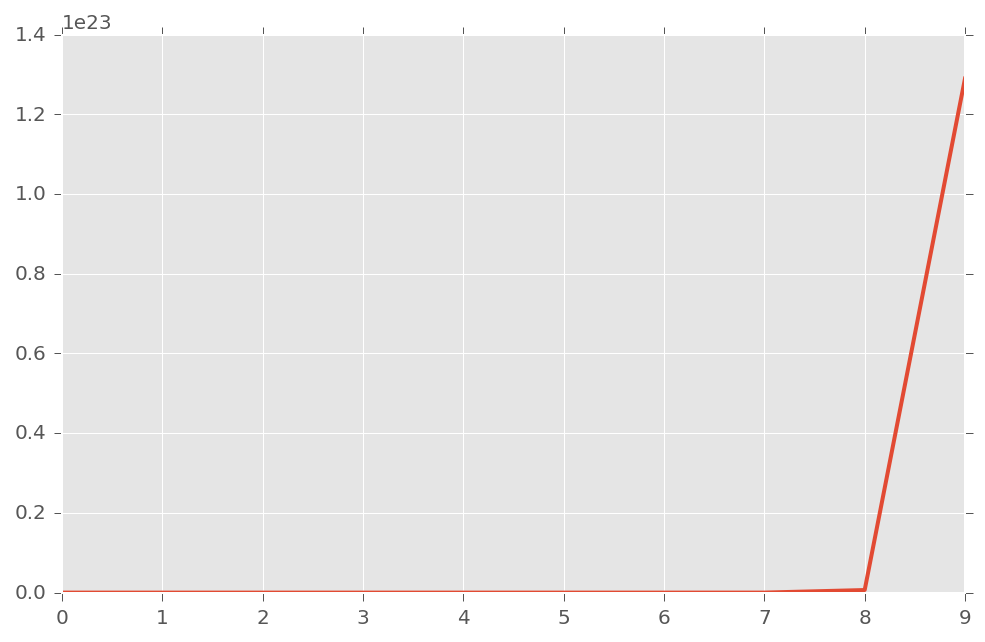

In [33]:
solution = islice(iht(A, obs, 4), 10)
pl.plot([np.linalg.norm(X - X_recons) 
         for X_recons in solution])
